### ANALIZA EXERCISE.CSV


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# for creating a responsive plot 
%matplotlib widget 
  
# importing required libraries 
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
df = pd.read_csv("exercise.csv",sep = ',')
df.head()

,y,x1,x2
0,15.68,6.87,14.09
1,6.18,4.40,4.35
2,18.10,0.43,18.09
3,9.07,2.73,8.65
4,17.97,3.25,17.68


In [3]:
X1 = np.vstack([df['x1'][:40],np.ones(40)]).T
mx1, cx1 = np.linalg.lstsq(X1,df['y'][:40],rcond = None)[0]
print('mx1 = ',mx1,'cx1 = ', cx1)

mx1 =  0.6558709106813979 cx1 =  10.063304177810789


In [4]:
X2 = np.vstack([df['x2'][:40],np.ones(40)]).T
mx2, cx2 = np.linalg.lstsq(X2,df['y'][:40],rcond = None)[0]
print('mx2 = ',mx2,'cx2 = ', cx2)

mx2 =  0.8322312760243954 cx2 =  3.785317221518588


In [5]:
X3 = np.vstack([df['x1'][:40],df['x2'][:40],np.ones(40)]).T 
mx1_3d,mx2_3d,cx_3d = np.linalg.lstsq(X3,df['y'][:40],rcond = None)[0]


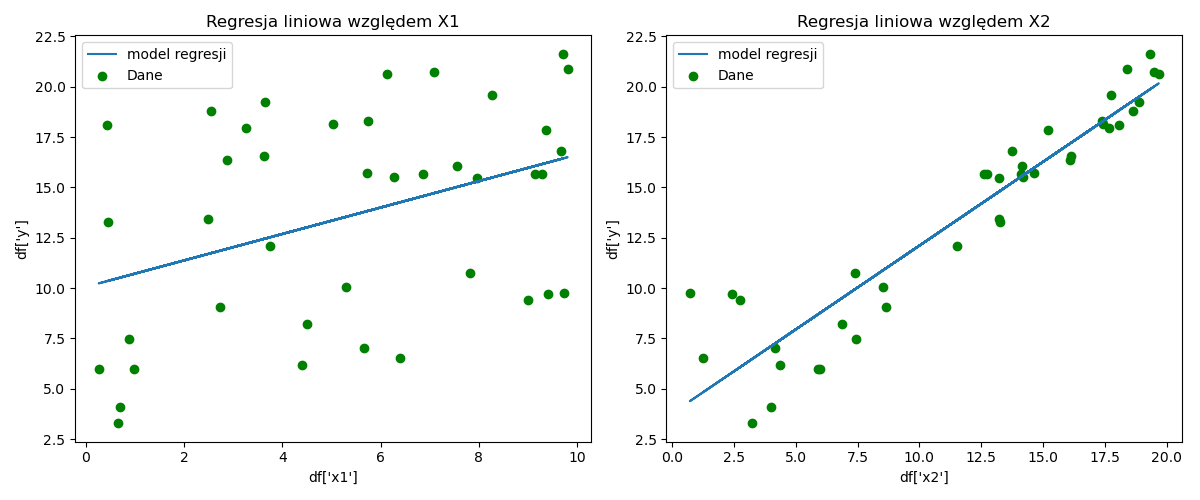

In [6]:
fig1,(ax1,ax2) = plt.subplots(1,2,figsize=(12, 5))
ax1.plot(df['x1'][:40], df['x1'][:40] * mx1 + cx1 , label = 'model regresji')
ax1.scatter(df['x1'][:40],df['y'][:40],label = 'Dane',color = 'green')
ax1.set_title("Regresja liniowa względem X1")
ax1.set_xlabel("df['x1']")
ax1.set_ylabel("df['y']")
ax1.legend()

ax2.plot(df['x2'][:40], df['x2'][:40] * mx2 + cx2 , label = 'model regresji')
ax2.scatter(df['x2'][:40],df['y'][:40],label = 'Dane', color = 'green')
ax2.set_title("Regresja liniowa względem X2")
ax2.set_xlabel("df['x2']")
ax2.set_ylabel("df['y']")
ax2.legend()

plt.tight_layout()
plt.show()

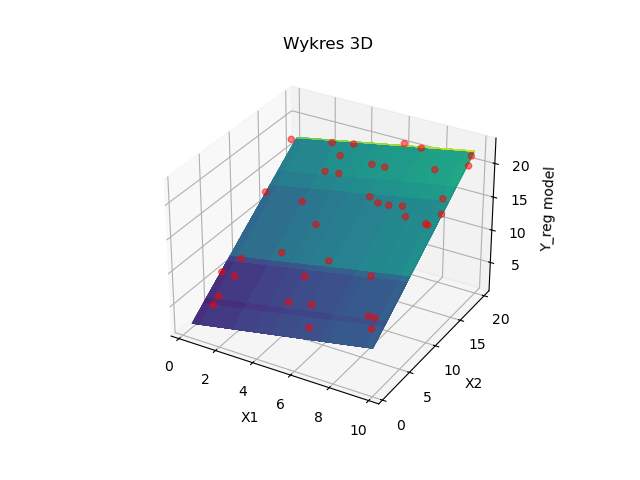

In [7]:
x1_3d, x2_3d = np.meshgrid(df['x1'][:40], df['x2'][:40])
y_reg_3d = mx1_3d * x1_3d + mx2_3d * x2_3d + cx_3d
%matplotlib widget 
fig = plt.figure()
ax = Axes3D(fig) 
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_3d, x2_3d, y_reg_3d, cmap='viridis')
ax.scatter(df['x1'][:40], df['x2'][:40], df['y'][:40], marker='o',color = 'red',alpha = 0.5)
# etykiety
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y_reg model')
ax.set_title('Wykres 3D')
# Wyświetlamy wykres
plt.show()

In [8]:

beauty = pd.read_csv("beauty.csv")

print(beauty.head())

   tenured  profnumber  minority  age  beautyf2upper  beautyflowerdiv  \
0        0           1         1   36              6                5   
1        1           2         0   59              2                4   
2        1           3         0   51              5                5   
3        1           4         0   40              4                2   
4        0           5         0   31              9                7   

   beautyfupperdiv  beautym2upper  beautymlowerdiv  beautymupperdiv  ...  \
0                7              6                2                4  ...   
1                4              3                2                3  ...   
2                2              3                2                3  ...   
3                5              2                3                3  ...   
4                9              6                7                6  ...   

   nonenglish  onecredit  percentevaluating  profevaluation  students  \
0           0          0       

In [9]:
Y_beauty = beauty['courseevaluation']
X_beauty = np.vstack([beauty['btystdave'],np.ones(len(beauty['btystdave']))]).T

beauty_ax,beauty_cx = np.linalg.lstsq(X_beauty,Y_beauty,rcond = None)[0]
y_pred_beauty = beauty['btystdave'] * beauty_ax + beauty_cx
residuals_beauty = Y_beauty - y_pred_beauty

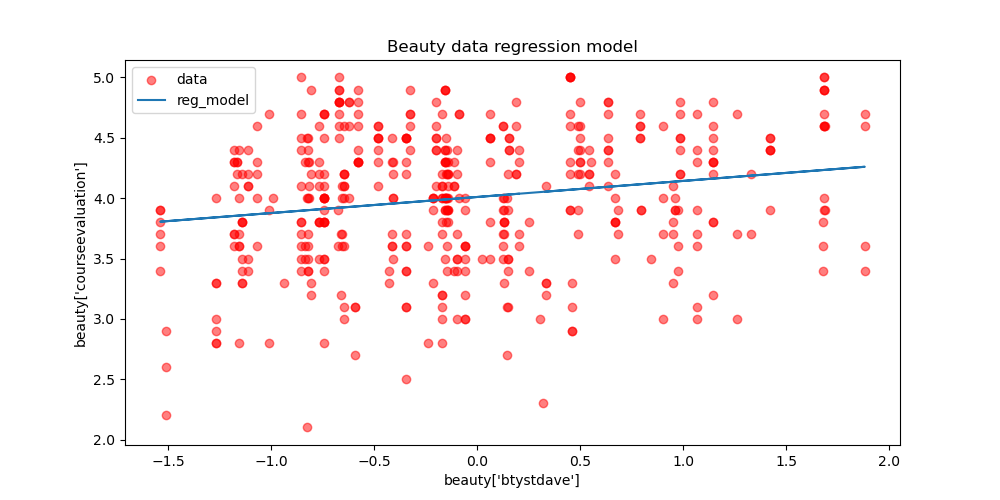

In [10]:
fig_beauty,ax_beauty = plt.subplots(figsize = (10,5))

ax_beauty.scatter(beauty['btystdave'],Y_beauty, color = 'red',alpha = 0.5,marker = 'o',label = 'data')
ax_beauty.plot(beauty['btystdave'],y_pred_beauty, label = 'reg_model')

ax_beauty.set_xlabel("beauty['btystdave']")
ax_beauty.set_ylabel("beauty['courseevaluation']")
ax_beauty.set_title('Beauty data regression model')
ax_beauty.legend()
plt.show()

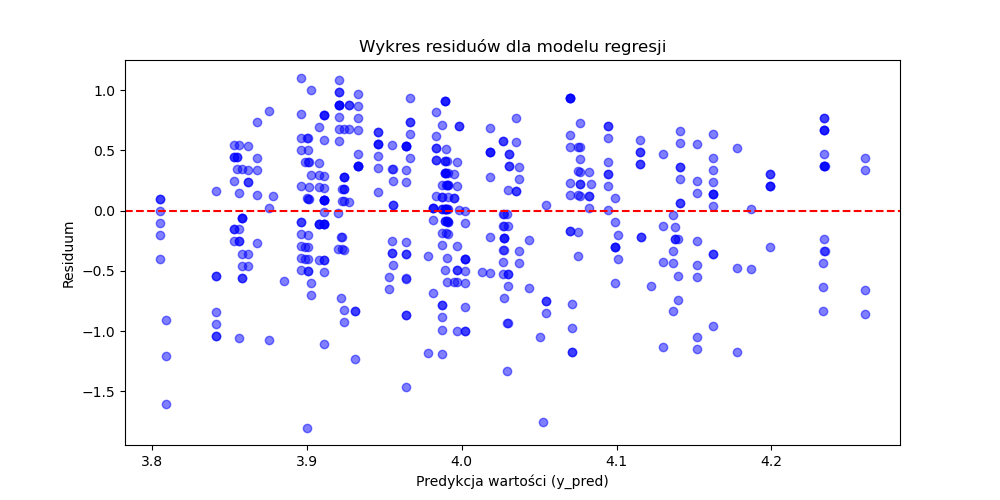

In [11]:
# Wykres residuów względem wartości przewidywanych
fig_residuals, ax_residuals = plt.subplots(figsize=(10, 5))

# Wykres: wartości przewidywane (y_pred) na osi X, residuua na osi Y
ax_residuals.scatter(y_pred_beauty, residuals_beauty, color='blue', alpha=0.5, marker='o')

# Linia pozioma na poziomie 0 (wskazująca brak residuów)
ax_residuals.axhline(0, color='red', linestyle='--')

ax_residuals.set_xlabel("Predykcja wartości (y_pred)")
ax_residuals.set_ylabel("Residuum")
ax_residuals.set_title("Wykres residuów dla modelu regresji")
plt.show()